In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset

fashion_mnist = keras.datasets.fashion_mnist  #load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split 

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


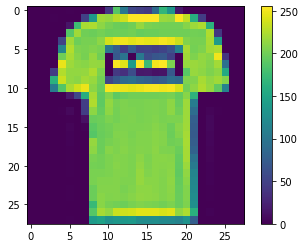

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images= test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
    keras.layers.Dense(128, activation='relu'), #hidden layers (2)
    keras.layers.Dense(10, activation='softmax'), #output layer(3)
])

In [10]:
# compiling the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4999 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3347 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3116 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.8913: 0s - loss: 0
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2572 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - accuracy: 0.9074: 0s - loss: 0
Epoch 10/10
1875/1875 [==============================]

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8835


In [13]:
print('Test accuracy', test_acc)

Test accuracy 0.8834999799728394


In [14]:
predictions = model.predict(test_images)

In [15]:
print(predictions)

[[5.0828402e-07 3.9515866e-11 1.8523338e-10 ... 9.8499283e-03
  1.0294322e-07 9.8832721e-01]
 [4.3725686e-05 2.0334491e-12 9.9737501e-01 ... 4.3481555e-14
  9.5320907e-10 6.5114662e-13]
 [4.8351917e-10 1.0000000e+00 8.9339490e-13 ... 1.2570158e-23
  2.7429807e-14 1.9459241e-23]
 ...
 [1.0085493e-05 2.0678835e-11 5.2472433e-07 ... 5.0018807e-09
  9.9971122e-01 1.5758565e-11]
 [2.3955482e-09 9.9998987e-01 3.4030770e-10 ... 1.2168025e-13
  5.1684285e-10 4.0384219e-12]
 [2.4025132e-05 2.2747587e-08 1.0913097e-05 ... 3.4950077e-04
  5.2993109e-05 1.1002082e-06]]


In [16]:
print(np.argmax(predictions[0]))

9


Trouser


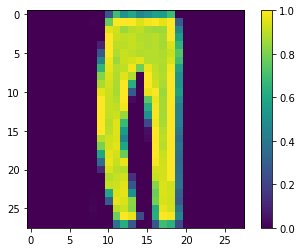

In [17]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 2


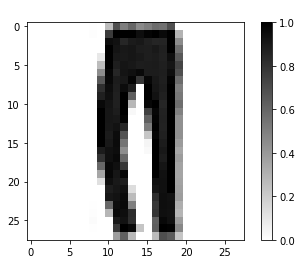

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
        
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <=num <=1000:
                return int(num)
            else:
                print("Try again ...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

    
